In [1]:
import torch
from torch.autograd import Variable
import torchvision
from torch import nn
import numpy as np
import sklearn, sklearn.model_selection
import random, argparse, pickle, collections
import datasets
import matplotlib.pyplot as plt
import models.simple_cnn
%matplotlib inline

In [2]:
import sys
import argparse

sys.argv = ['a','-thing']
    
parser = argparse.ArgumentParser()

parser.add_argument('-seed', type=int, nargs='?', default=0, help='random seed for split and init')
parser.add_argument('-nsamples', type=int, nargs='?', default=256, help='Number of samples for train')
parser.add_argument('-maxmasks', type=int, nargs='?', default=64, help='Number of masks to use for train')
parser.add_argument('-maskblur', type=int, nargs='?', default=4, help='std for blur applied to each mask')
parser.add_argument('-annealinglambda', type=float, default=1.0, help='Annealing')
parser.add_argument('-lr', type=float, default=0.001)
parser.add_argument('-batchsize', type=int, default=32)
parser.add_argument('-thing', default=False, action='store_true', help='Do the thing')
parser.add_argument('-thingstyle', type=int, default=1, help='Do the thing style')
parser.add_argument('-dataset', type=str, default="lung", help='name of dataset')

args = parser.parse_args()

In [3]:
torch.manual_seed(args.seed);
random.seed(args.seed)

In [4]:
cuda = torch.cuda.is_available()

In [66]:
exp_id = str(args).replace(" ","").replace("Namespace(","").replace(")","").replace(",","-").replace("=","").replace("'","")
print(exp_id)

annealinglambda1.0-batchsize32-datasetlung-lr0.0001-maskblur3-maxmasks64-nsamples256-seed0-thingTrue-thingstyle1


In [ ]:
open("stats/" + exp_id + ".pkl", "r")

In [69]:
import os.path
if (not os.path.isfile("stats/" + exp_id + ".pkl")):
    sys.exit()

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [5]:
torch.manual_seed(args.seed)
random.seed(args.seed)

cuda = torch.cuda.is_available()

mytransform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(100),
    torchvision.transforms.ToTensor()])

In [6]:


# if args.dataset == "tnt":
#     train, valid, test = [datasets.TNTDataset('/data/lisa/data/brats2013_tumor-notumor/',
#                        mode=thismode,
#                        transform=mytransform,
#                        blur=args.maskblur,
#                        nsamples=args.nsamples,
#                        seed=args.seed, 
#                        maxmasks=args.maxmasks)
#                        for thismode in ["train", "valid", "test"]]
# elif args.dataset == "lung":
#     train, valid, test = [datasets.MSDDataset('/data/lisa/data/MSD/MSD/Task06_Lung/',
#                        mode=thismode,
#                        transform=mytransform,
#                        blur=args.maskblur,
#                        nsamples=args.nsamples,
#                        seed=args.seed, 
#                        maxmasks=args.maxmasks,
#                        max_files=10)
#                        for thismode in ["train", "valid", "test"]]
# elif args.dataset == "colon":
#     train, valid, test = [datasets.MSDDataset('/data/lisa/data/MSD/MSD/Task10_Colon/',
#                        mode=thismode,
#                        transform=mytransform,
#                        blur=args.maskblur,
#                        nsamples=args.nsamples,
#                        seed=args.seed, 
#                        maxmasks=args.maxmasks, 
#                        max_files=10)
#                        for thismode in ["train", "valid", "test"]]




In [7]:
# len(train.dataset["training"])

In [20]:
reload(datasets);

In [32]:
train = datasets.MSDDataset('/data/lisa/data/MSD/MSD/Task06_Lung/',
                   mode="train",
                   #transform=mytransform,
                   blur=args.maskblur,
                   nsamples=64,
                   seed=args.seed, 
                   maxmasks=args.maxmasks,
                   max_files=5)
valid = datasets.MSDDataset('/data/lisa/data/MSD/MSD/Task06_Lung/',
                   mode="valid",
                   #transform=mytransform,
                   blur=args.maskblur,
                   nsamples=64,
                   seed=args.seed, 
                   maxmasks=args.maxmasks,
                   max_files=5)
test = datasets.MSDDataset('/data/lisa/data/MSD/MSD/Task06_Lung/',
                   mode="test",
                   #transform=mytransform,
                   blur=args.maskblur,
                   nsamples=64,
                   seed=args.seed, 
                   maxmasks=args.maxmasks,
                   max_files=5)
                   #for thismode, files, num in [("train", 60, 5000),("valid", 10, 256),("test",10,256),]]

mode=train
(u'./imagesTr/lung_064.nii.gz', u'./labelsTr/lung_064.nii.gz')
Counter({False: 193, True: 55})
(u'./imagesTr/lung_073.nii.gz', u'./labelsTr/lung_073.nii.gz')
Counter({False: 447, True: 46})
(u'./imagesTr/lung_096.nii.gz', u'./labelsTr/lung_096.nii.gz')
Counter({False: 239, True: 12})
(u'./imagesTr/lung_075.nii.gz', u'./labelsTr/lung_075.nii.gz')
Counter({False: 388, True: 35})
(u'./imagesTr/lung_048.nii.gz', u'./labelsTr/lung_048.nii.gz')
Counter({False: 308, True: 14})
Counter({False: 1575, True: 162})
mode=valid
(u'./imagesTr/lung_034.nii.gz', u'./labelsTr/lung_034.nii.gz')
Counter({False: 269, True: 27})
(u'./imagesTr/lung_031.nii.gz', u'./labelsTr/lung_031.nii.gz')
Counter({False: 234, True: 70})
(u'./imagesTr/lung_016.nii.gz', u'./labelsTr/lung_016.nii.gz')
Counter({False: 207, True: 21})
(u'./imagesTr/lung_058.nii.gz', u'./labelsTr/lung_058.nii.gz')
Counter({False: 231, True: 10})
(u'./imagesTr/lung_086.nii.gz', u'./labelsTr/lung_086.nii.gz')
Counter({False: 226, True:

In [33]:
args.seed = 0

In [34]:
print("classes train", collections.Counter(train.labels))
print("classes valid", collections.Counter(valid.labels))
print("classes test", collections.Counter(test.labels))

train_loader = torch.utils.data.DataLoader(dataset=train, batch_size=args.batchsize,num_workers=0,shuffle=True)
valid_loader = torch.utils.data.DataLoader(dataset=valid, batch_size=len(valid),num_workers=8, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test, batch_size=len(test), num_workers=8, shuffle=True)

print("Building valid set")
valid_data = list(valid_loader)
valid_x = Variable(valid_data[0][0][0]).cuda()
valid_y = valid_data[0][1].cuda()
print("done")

print("Building test set")
test_data = list(test_loader)
test_x = Variable(test_data[0][0][0]).cuda()
test_y = test_data[0][1].cuda()
print("done")

('classes train', Counter({False: 32, True: 32}))
('classes valid', Counter({False: 32, True: 32}))
('classes test', Counter({False: 32, True: 32}))
Building valid set
done
Building test set
done


In [35]:
# train_loader = torch.utils.data.DataLoader(dataset=train, batch_size=64,num_workers=0,shuffle=True)


In [450]:
import models.simple_cnn2
reload(models.simple_cnn2)

torch.manual_seed(args.seed)
random.seed(args.seed)

cnn = models.simple_cnn2.CNN(train[0][0][0])
cnn = cnn.cuda()

print(cnn)


CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): Dropout(p=0.2)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (conv2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
    (1): Dropout(p=0.2)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (conv3): Sequential(
    (0): Conv2d(128, 64, kernel_size=(6, 6), stride=(2, 2))
    (1): ReLU()
  )
  (pool): MaxPool2d(kernel_size=20, stride=1, padding=0, dilation=1, ceil_mode=False)
  (out): Sequential(
    (0): Linear(in_features=576, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=2, bias=True)
  )
)


In [451]:
args.lr = 0.0001
optimizer = torch.optim.Adam(cnn.parameters(), lr=args.lr)
loss_func = nn.CrossEntropyLoss()

In [452]:
args.thingstyle = 1
args.thing = True
epoch = 0
args.annealinglambda = 1

In [ ]:
use_gradmask = args.thing
stats = []

for epoch in range(epoch, 800):
    batch_loss = []
    for step, (x, y, use_mask) in enumerate(train_loader):

        b_x = Variable(x[0], requires_grad=True)
        b_y = Variable(y)
        use_mask = Variable(use_mask)
        seg_x = x[1]

        if cuda:
            b_x = b_x.cuda()
            b_y = b_y.cuda()
            seg_x = seg_x.cuda()
            use_mask = use_mask.cuda()

        cnn.train()
        output = cnn(b_x)[0]
        loss = loss_func(output, b_y)

        if use_gradmask:
            if args.thingstyle == 1:
                input_grads = \
                torch.autograd.grad(outputs=torch.abs(output[:, 1]).sum(),
                                    inputs=b_x,
                                    create_graph=True)[0]

            elif args.thingstyle == 2:
                input_grads = \
                torch.autograd.grad(outputs=(torch.abs(output[:,1]).sum()),
                                    inputs=b_x,
                                    create_graph=True)[0]
                input_grads2 = \
                torch.autograd.grad(outputs=(torch.abs(output[:,0]).sum()),
                                    inputs=b_x,
                                    create_graph=True)[0]
                input_grads = torch.abs(input_grads) - torch.abs(input_grads2)


            # only apply to positive examples
            input_grads = b_y.float().reshape(-1, 1, 1, 1) * input_grads

            res = input_grads * (1 - seg_x.float())
            gradmask_loss = (res ** 2)

            # Simulate that we only have some masks
            gradmask_loss = use_mask.reshape(-1, 1).float() * gradmask_loss.float().reshape(-1, np.prod(gradmask_loss.shape[1:]))

            gradmask_loss = gradmask_loss.sum()
            gradmask_loss = epoch * args.annealinglambda * gradmask_loss
            loss = gradmask_loss + loss

        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()

        batch_loss.append(loss.data[0])
        # print (loss)

    cnn.eval()

    valid_output, last_layer = cnn(valid_x)
    pred_valid_y = torch.max(valid_output, 1)[1].data.squeeze()
    valid_auc = sklearn.metrics.roc_auc_score(valid_y, pred_valid_y.cpu())

    test_output, last_layer = cnn(test_x)
    pred_test_y = torch.max(test_output, 1)[1].data.squeeze()
    test_auc = sklearn.metrics.roc_auc_score(test_y, pred_test_y.cpu())

    stat = {"epoch": epoch,
            "trainloss": np.asarray(batch_loss).mean(),
            "validauc": valid_auc,
            "testauc": test_auc}
    stat.update(vars(args))
    stats.append(stat)
    print('Epoch: ', epoch, '| train loss: %.4f' % np.asarray(batch_loss).mean(), '| valid auc: %.2f' % valid_auc, '| test auc: %.2f' % test_auc)
    processImages("test", epoch)
    # os.mkdir("stats")
#    if (epoch % 20) == 0: # 20 times faster 
#        pickle.dump(stats, open("stats/" + exp_id + ".pkl", "wb"))


a:56: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


('Epoch: ', 0, '| train loss: 0.6976', '| valid auc: 0.50', '| test auc: 0.50')
('Epoch: ', 1, '| train loss: 0.6860', '| valid auc: 0.50', '| test auc: 0.52')
('Epoch: ', 2, '| train loss: 0.6908', '| valid auc: 0.55', '| test auc: 0.53')
('Epoch: ', 3, '| train loss: 0.6885', '| valid auc: 0.52', '| test auc: 0.53')
('Epoch: ', 4, '| train loss: 0.6865', '| valid auc: 0.52', '| test auc: 0.52')
('Epoch: ', 5, '| train loss: 0.6812', '| valid auc: 0.52', '| test auc: 0.53')
('Epoch: ', 6, '| train loss: 0.6791', '| valid auc: 0.56', '| test auc: 0.55')
('Epoch: ', 7, '| train loss: 0.6818', '| valid auc: 0.59', '| test auc: 0.58')
('Epoch: ', 8, '| train loss: 0.6781', '| valid auc: 0.58', '| test auc: 0.59')
('Epoch: ', 9, '| train loss: 0.6714', '| valid auc: 0.56', '| test auc: 0.59')
('Epoch: ', 10, '| train loss: 0.6697', '| valid auc: 0.58', '| test auc: 0.62')
('Epoch: ', 11, '| train loss: 0.6675', '| valid auc: 0.59', '| test auc: 0.64')
('Epoch: ', 12, '| train loss: 0.6700'

In [ ]:
plt.imshow(b_x[0][0].detach())

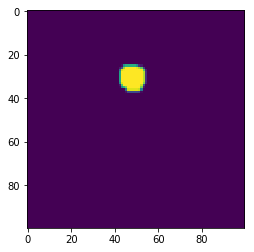

In [127]:
plt.imshow(seg_x[0][0].detach())

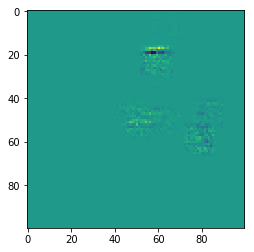

In [125]:
plt.imshow(input_grads)

In [51]:
# import pandas as pd
# pd.DataFrame(stats)

In [290]:
valid.blur=6

In [442]:
#to make video: ffmpeg -y -i images/image-test-%d.png -vcodec libx264 aout.mp4
def processImages(text, i):
    fig = plt.Figure(figsize=(20, 10), dpi=160)
    gcf = plt.gcf()
    gcf.set_size_inches(20, 10)
    fig.set_canvas(gcf.canvas)
    gridsize = (3,6)
    x, y, z = valid[2]
    
    x_var = Variable(x[0].unsqueeze(0).cuda(), requires_grad=True)
    cnn.eval()
    pred, res = cnn(x_var)

    input_grads0 = torch.autograd.grad(outputs=(torch.abs(pred[:,0]).sum()), 
                                           inputs=x_var,
                                           create_graph=True)[0]
    input_grads1 = torch.autograd.grad(outputs=(torch.abs(pred[:,1]).sum()), 
                                           inputs=x_var,
                                           create_graph=True)[0]
    
    input_grads0 = input_grads0[0][0].cpu().detach().numpy()
    input_grads1 = input_grads1[0][0].cpu().detach().numpy()

    
    
    

    ax2 = plt.subplot2grid(gridsize, (0, 0), colspan=1)
    ax3 = plt.subplot2grid(gridsize, (0, 1), colspan=1)
    ax4 = plt.subplot2grid(gridsize, (0, 2), colspan=1)
    ax5 = plt.subplot2grid(gridsize, (0, 3), rowspan=1)
    ax6 = plt.subplot2grid(gridsize, (0, 4), rowspan=1)

    ax2.set_title(str(i) + "Input Image")
    ax2.imshow(x[0][0], interpolation='none', cmap='Greys_r')
    ax3.set_title("Masked input")
    ax3.imshow(x[1][0]*x[0][0], interpolation='none', cmap='Greys_r')
    ax4.set_title("grad for class 1")
    ax4.imshow(np.abs(input_grads1), cmap="jet", interpolation='none')
    ax5.set_title("grad1 masked")
    ax5.imshow(np.abs(input_grads1)*x[1][0], cmap="jet", interpolation='none')
    ax6.set_title("|grad1|-|grad0|")
    ax6.imshow(np.abs(input_grads1 - input_grads0), cmap="jet", interpolation='none')
    
    
    
    ax2 = plt.subplot2grid(gridsize, (1, 0), colspan=1)
    ax3 = plt.subplot2grid(gridsize, (1, 1), colspan=1)
    ax4 = plt.subplot2grid(gridsize, (1, 2), colspan=1)
    ax5 = plt.subplot2grid(gridsize, (1, 3), rowspan=1)
    ax6 = plt.subplot2grid(gridsize, (1, 4), rowspan=1)
    
    ax2.set_title("mean abs conv1")
    ax2.imshow(res["conv1"].detach()[0].abs().mean(0), interpolation='none')
    ax3.set_title("mean abs conv2")
    ax3.imshow(res["conv2"].detach()[0].abs().mean(0), interpolation='none')
    ax4.set_title("mean abs conv3")
    ax4.imshow(res["conv3"].detach()[0].abs().mean(0), interpolation='none')
#     ax5.set_title("pool")
#     ax5.imshow(res["pool"].detach()[0].mean(0), interpolation='none')



    ax2 = plt.subplot2grid(gridsize, (2, 0), colspan=1)
    ax3 = plt.subplot2grid(gridsize, (2, 1), colspan=1)
    ax4 = plt.subplot2grid(gridsize, (2, 2), colspan=1)
    ax5 = plt.subplot2grid(gridsize, (2, 3), rowspan=1)
    ax6 = plt.subplot2grid(gridsize, (2, 4), rowspan=1)
    
    
    aaaa = torch.autograd.grad(outputs=(torch.abs(pred[:,1]).sum()),inputs=res["conv1"],create_graph=True)[0]
    ax2.set_title("grad1 at conv1")
    ax2.imshow(aaaa.detach()[0].abs().sum(0), interpolation='none',  cmap="jet")
    
    aaaa = torch.autograd.grad(outputs=(torch.abs(pred[:,1]).sum()),inputs=res["conv2"],create_graph=True)[0]
    ax3.set_title("grad1 at conv2")
    ax3.imshow(aaaa.detach()[0].abs().sum(0), interpolation='none',  cmap="jet")
    
    aaaa = torch.autograd.grad(outputs=(torch.abs(pred[:,1]).sum()),inputs=res["conv3"],create_graph=True)[0]
    ax4.set_title("grad1 at conv3")
    ax4.imshow(aaaa.detach()[0].abs().sum(0), interpolation='none',  cmap="jet")
#     ax3.set_title("conv2")
#     ax3.imshow(res["conv2"].detach()[0].mean(0), interpolation='none')
#     ax4.set_title("conv3")
#     ax4.imshow(res["conv3"].detach()[0].mean(0), interpolation='none')
#     ax5.set_title("pool")
#     ax5.imshow(res["pool"].detach()[0].mean(0), interpolation='none')


#     ax5.set_title("Real " + str(lab_est))
#     ax5.set_ylim((0, np.max(lab_est)*2))
#     ax5.set_xticks(np.arange(0, noutputs, 1.0))
#     ax5.bar(range(noutputs),lab_est, align='center')
#     ax6.set_title("Pred " + str(pred_est))
#     ax6.set_ylim((0, np.max(lab_est)*2))
#     ax6.set_xticks(np.arange(0, noutputs, 1.0))
#     ax6.bar(range(noutputs),pred_est, align='center')
    if not os.path.exists('images'): 
        os.mkdir('images')
    fig.savefig('images/image-' + text + "-" + str(i) + '.png', bbox_inches='tight', pad_inches=0)

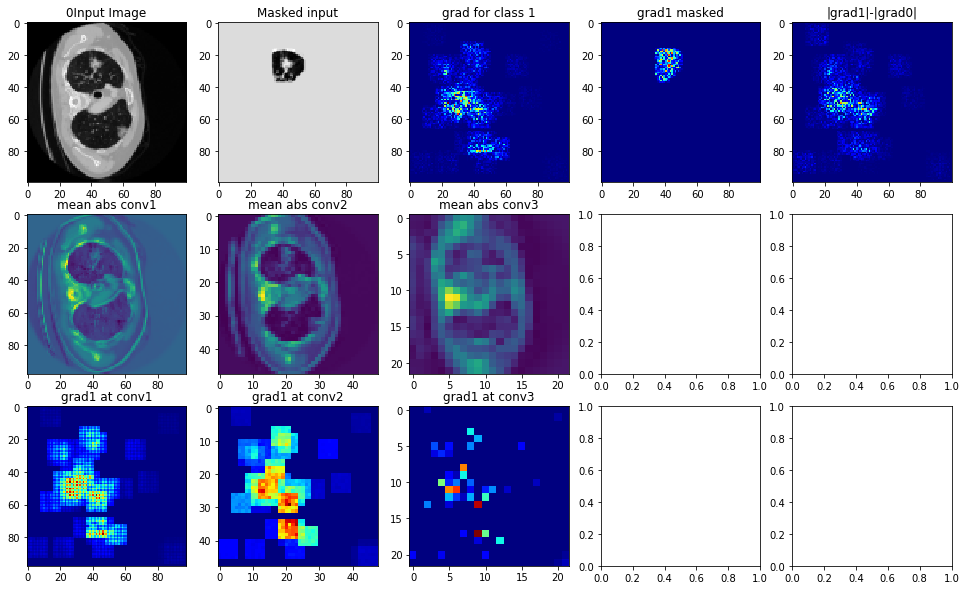

In [449]:
processImages("testtt", 0)
plt.show()

In [41]:
# processImages("testttt", 0)
# plt.show()

In [232]:
##############################################
##############################################
##############################################
##############################################
## below is code to debug the model

In [194]:
mask_idx

array([3324, 2694, 1044,  885, 1272, 2152, 2654,  614, 2898,  311,  242,
       2696, 3316, 3320,  815, 1667,  692, 1725,  691, 2703,  443, 2867,
       1446, 1626,  608, 3318, 2423, 2479,  447, 2016, 1032, 1978, 2025,
       2167, 2650, 2674, 2526,  282, 1983, 1548, 1503,  445, 3361,  449,
       1982, 2070, 2975, 2707, 1508, 2660, 2154, 1663, 2702, 1374, 2144,
        528, 3323, 2122,  525,  426, 2348,  389,  582,  821])

In [20]:
x, y, z = train[24]

In [21]:
z

1.0

In [22]:
x[0].shape

torch.Size([1, 100, 100])

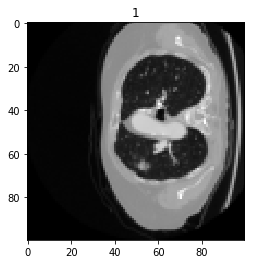

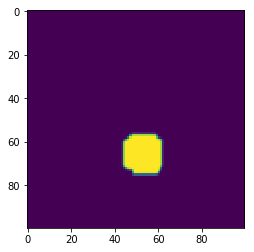

In [213]:
x, y, z = train[0]
plt.imshow(x[0][0], cmap="gray");
plt.title(y);
plt.show()
plt.imshow(x[1][0]);
plt.show()

In [214]:
train.blur = 6

In [192]:
pred

tensor([[-1.1178,  2.0169]], device='cuda:0')

In [193]:
torch.abs(pred[:,1]).sum()

tensor(2.0169, device='cuda:0')

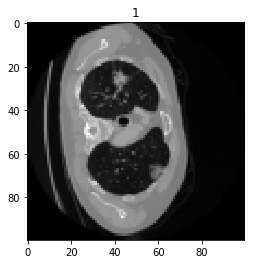

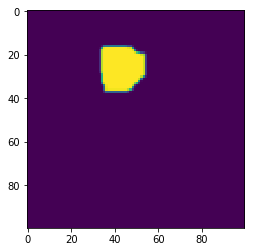

In [323]:
x, y, z = valid[2]
plt.imshow(x[0][0], cmap="gray");
plt.title(y);
plt.show()
plt.imshow(x[1][0]);
plt.show()
x_var = Variable(x[0].unsqueeze(0).cuda(), requires_grad=True)
pred, res = cnn(x_var)


In [332]:
res["conv1"].detach()[0].mean(1)

tensor([[ 0.0844,  0.0830,  0.0812,  ...,  0.0865,  0.0870,  0.0874],
        [ 0.2992,  0.2938,  0.2896,  ...,  0.3080,  0.3091,  0.3103],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.3101,  0.3071,  0.3044,  ...,  0.3352,  0.3363,  0.3384],
        [ 0.5575,  0.5510,  0.5422,  ...,  0.5944,  0.5973,  0.6012],
        [ 0.2209,  0.2176,  0.2144,  ...,  0.2299,  0.2308,  0.2319]], device='cuda:0')

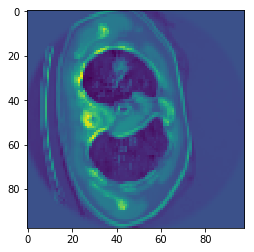

In [344]:
plt.imshow(res["conv1"].detach()[0].mean(0))

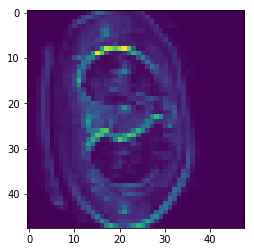

In [335]:
plt.imshow(res["conv2"].detach()[0].mean(0))

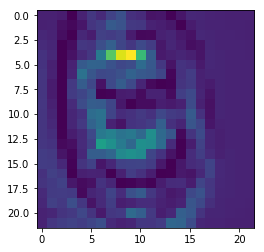

In [336]:
plt.imshow(res["conv3"].detach()[0].mean(0))

In [322]:
pred

tensor([[-0.9724,  1.8972]], device='cuda:0')

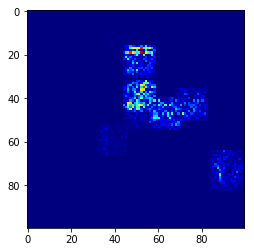

In [267]:
input_grads = torch.autograd.grad(outputs=(torch.abs(pred[:,1]).sum()), 
                                       inputs=x_var,
                                       create_graph=True)[0]
input_grads = input_grads[0][0].cpu().detach().numpy()
plt.imshow(np.abs(input_grads), cmap="jet");

In [268]:
input_grads.sum()

-0.00031527865

In [269]:
# input_grads2 = torch.autograd.grad(outputs=torch.abs(pred[:,0]).sum(), 
#                                        inputs=x_var,
#                                        create_graph=True)[0]
# input_grads2 = input_grads2[0][0].cpu().detach().numpy()
# plt.imshow(np.abs(input_grads2), cmap="jet");

In [270]:
(input_grads-input_grads2).max()

0.0004758468

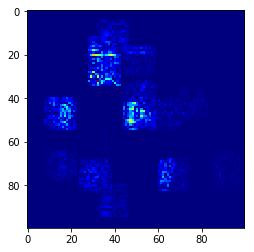

In [271]:
plt.imshow(np.abs(input_grads-input_grads2), cmap="jet")

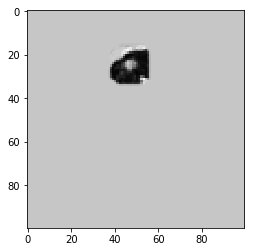

In [272]:
plt.imshow(x[0][0]*x[1][0], cmap="gray")

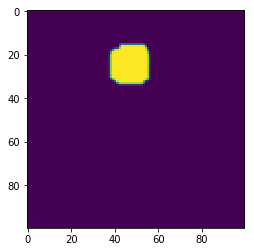

In [273]:
plt.imshow(x[1][0])

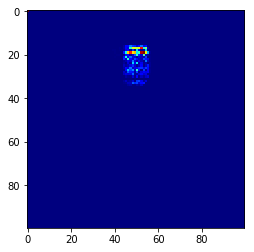

In [274]:
#these are the only allowed grads
masked_grads = np.abs(input_grads)*(x[1][0])
masked_grads[0][0] = torch.FloatTensor(np.abs(input_grads)).max()
plt.imshow(masked_grads, cmap="jet")

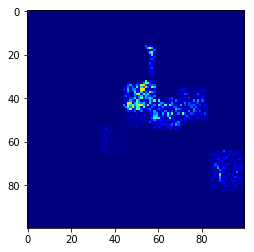

In [275]:
#We can regularize to reduce this
masked_grads = np.abs(input_grads)*(1-x[1][0])
masked_grads[0][0] = torch.FloatTensor(np.abs(input_grads)).max()
plt.imshow(masked_grads, cmap="jet")

In [276]:
import skimage.filters
enlarged_mask = skimage.filters.gaussian(x[2][0].numpy(),15)
enlarged_mask = enlarged_mask/enlarged_mask.max()
enlarged_mask.max()

IndexError: tuple index out of range

In [114]:
plt.imshow(enlarged_mask)

NameError: name 'enlarged_mask' is not defined

In [59]:
#assuming the segmentations are sloppy we can enlarge the segmentations
masked_grads = input_grads*(1-enlarged_mask)
plt.imshow(masked_grads)

NameError: name 'enlarged_mask' is not defined

In [ ]:
#torch.save(cnn.state_dict(), "./classifier_model.pth")

In [18]:
# checkpoint = torch.load("./classifier_model.pth")
# cnn.load_state_dict(checkpoint)

In [ ]:
# cnn.eval()
# test_output, last_layer = cnn(valid_x)
# pred_y = torch.max(test_output, 1)[1].data.squeeze()
# accuracy = float((pred_y == valid_y).sum()) / float(valid_y.size(0))
# print 'valid accuracy: %.2f' % accuracy